<function matplotlib.pyplot.show(*args, **kw)>

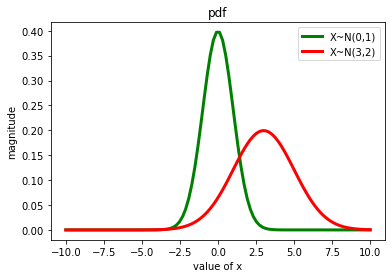

In [1]:
# Question 1a
import numpy as np
import matplotlib.pyplot as plt 

u1,sigma1=0,1  #mean and standard deviation of the first gausian randon variable
x= np.linspace(-10,10,100,endpoint=True)#defining x value in range 
y1= 1/(sigma1*np.sqrt(2*np.pi))*np.exp(-(x-u1)**2/(2*sigma1**2))#expression of GRV1
u2,sigma2= 3,2  #mean and standard deviation of the second gausian random variable
y2= 1/(sigma2*np.sqrt(2*np.pi))*np.exp(-(x-u2)**2/(2*sigma2**2))#expression of GRV2
# for plotting the pdf 
plt.plot(x,y1,'-g',linewidth=3,label= "X~N(0,1)")
plt.plot(x,y2,'-r',linewidth=3,label= "X~N(3,2)")
plt.title('pdf')
plt.xlabel('value of x')
plt.ylabel('magnitude')
plt.legend(loc=1)
plt.show


There is difference between the plot that is the magnitude of both plot is different .It is because of the sigma value .
Both the plots have a bell shape where the centre of the bell is x= mean and sigma reflect the width of the bell. If sigma is
 small , bell is narrow with high peak and if sigma value is large the bell is wide with low ,flat peak . 

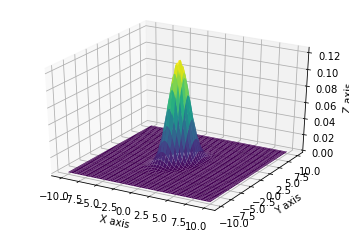

In [2]:
# Question 1b
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
# Create grid and multivariate normal
x = np.linspace(-10,10,100)#defining x value in range
y = np.linspace(-10,10,100)#defining y value in range 
X, Y = np.meshgrid(x,y) #creating meshgrid
# Take X and Y into a three dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X 
pos[:, :, 1] = Y
mean = np.array([0, 0])#mean vector matrix
cov  = np.array([[1,0.6],[0.6,2]])# covariance matrix
# The distribution on the variables X, Y packed into pos
rv = multivariate_normal(mean,cov)#creating multivariate normal 
# To make 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=4)# to make surface 3D plot
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()


In [37]:
#question 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing the data file
dataset = pd.read_table('C:/data/iris.data',sep=",")
attributes=["sepal_length","sepal_width","petal_length","petal_width","class"]
dataset.columns=attributes

#Spliting the dataset in independent and dependent variable
X = dataset.iloc[:,:4].values
y = dataset["class"].values

#Splitting the dataset into the training set and test set 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=105)


#Fitting Naive Bayes Classification to the Training set with linear Kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier=GaussianNB()
nvclassifier.fit(X_train,y_train)

#predicting the test set results
y_pred=nvclassifier.predict(X_test)

#the confusion matrix
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test,y_pred)
print(' Confusion matrix is:',c_m)

#to find the accuracy from the confussion matrix
A= c_m.shape
cp=0
fp = 0
for row in range(A[0]):
    for c in range(A[1]):
        if row==c:
            cp +=c_m[row,c]
        else:
            fp +=c_m[row,c]
print('correct predictions:',cp)
print('false prediction:',fp)
accuracy = cp/(c_m.sum())
print('Accuracy is:',accuracy)

 Confusion matrix is: [[12  0  0]
 [ 0 15  1]
 [ 0  0 17]]
correct predictions: 44
false prediction: 1
Accuracy is: 0.9777777777777777
